**CYBERSECURITY : Fraudulent Transaction Detection using Machine Learning**


---


Course Code: 21CSA391A

Student: Prardhna Prathap

Register Number: AA.SC.U3BCA2307031



---



# Project Overview


In [20]:
# ============================================================
# BCA MINOR PROJECT – CYBERSECURITY: FRAUDULENT TRANSACTION DETECTION USING MACHINE LEARNING
# Course Code: 21CSA391A
# Student: Prardhna Prathap
# Register Number: AA.SC.U3BCA2307031
# ============================================================
# Environment Setup
# Load Dataset
# Data Exploration (EDA)
# Data Preprocessing & Splitting
# SMOTE
# Model Training
# Model Evaluation
# Results & Visualization
# ============================================================


# Environment Setup

In [21]:
# Install Libraries
!pip install pandas numpy scikit-learn imbalanced-learn matplotlib seaborn


In [22]:
# Import libraries and verify versions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
import imblearn

print("Libraries imported successfully!")
print("Scikit-learn version:", sklearn_version)
print("Imbalanced-learn version:", imblearn.__version__)


Libraries imported successfully!
Scikit-learn version: 1.6.1
Imbalanced-learn version: 0.14.0


In [23]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
!ls "/content/drive/MyDrive/Minor Project -Cybersecurity with ML/Project_Setup"


archive.zip	logistic_regression_model.pkl
creditcard.csv	random_forest_model.pkl


In [25]:
# Verify project folder Structure
!unzip "/content/drive/MyDrive/Minor Project -Cybersecurity with ML/Project_Setup/archive.zip" -d "/content/drive/MyDrive/Minor Project -Cybersecurity with ML/Project_Setup"


Archive:  /content/drive/MyDrive/Minor Project -Cybersecurity with ML/Project_Setup/archive.zip
replace /content/drive/MyDrive/Minor Project -Cybersecurity with ML/Project_Setup/creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


#Load Dataset

In [26]:
#Load Dataset into Google Colab

data_path = "/content/drive/MyDrive/Minor Project -Cybersecurity with ML/Project_Setup/creditcard.csv"

df = pd.read_csv(data_path)

print("Dataset loaded successfully!")


Dataset loaded successfully!


In [27]:
# Preview First Few Rows
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [28]:
print("\nDataset Information:")
df.info()



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  f

In [29]:
# View Summary Statistics
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Data Exploration (EDA)

In [30]:
# Check missing / null values
print(df.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [31]:
# Examine Class Distribution
class_counts = df['Class'].value_counts()

print("Class counts:")
print(class_counts)

print("\nClass percentages:")
print((class_counts / len(df) * 100).round(4))


Class counts:
Class
0    284315
1       492
Name: count, dtype: int64

Class percentages:
Class
0    99.8273
1     0.1727
Name: count, dtype: float64


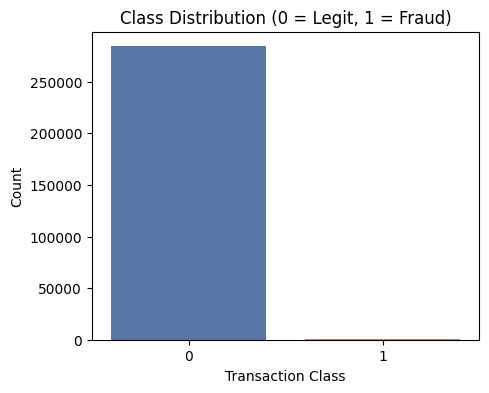

In [32]:
# Visualize Class Imbalance

plt.figure(figsize=(5,4))
sns.countplot(x='Class', hue='Class', data=df,
              palette=['#4C72B0', '#DD8452'],
              legend=False)
plt.title('Class Distribution (0 = Legit, 1 = Fraud)')
plt.xlabel('Transaction Class')
plt.ylabel('Count')
plt.show()



# Data Preprocessing & Splitting

In [33]:
# Normalize Amount and Time columns (StandardScaler)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Create normalized columns
df[['normAmount', 'normTime']] = scaler.fit_transform(df[['Amount', 'Time']])

# Drop original unscaled columns
df = df.drop(['Amount', 'Time'], axis=1)

# Verify new columns appear correctly
df[['normAmount', 'normTime']].head()

,normAmount,normTime
0,0.244964,-1.996583
1,-0.342475,-1.996583
2,1.160686,-1.996562
3,0.140534,-1.996562
4,-0.073403,-1.996541


In [34]:
# Split dataset into train and test sets
from sklearn.model_selection import train_test_split
# Define features (X) and target (y)
X = df.drop(['Class'], axis=1)
y = df['Class']

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# Verify the split sizes
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Class distribution in training set:")
print(y_train.value_counts(normalize=True) * 100)

Training set shape: (227845, 30)
Testing set shape: (56962, 30)
Class distribution in training set:
Class
0    99.827075
1     0.172925
Name: proportion, dtype: float64


#SMOTE

In [35]:
# Handle class imbalance using SMOTE (oversampling)
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit SMOTE on training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



In [36]:
# Verify balanced class counts
print("Before SMOTE:", y_train.value_counts())
print("\nAfter SMOTE:", y_train_resampled.value_counts())


Before SMOTE: Class
0    227451
1       394
Name: count, dtype: int64

After SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64


# Model Training

Logistic Regression Performance
--------------------------------
Precision: 0.0581
Recall   : 0.9184
F1-Score : 0.1094
ROC-AUC  : 0.9698




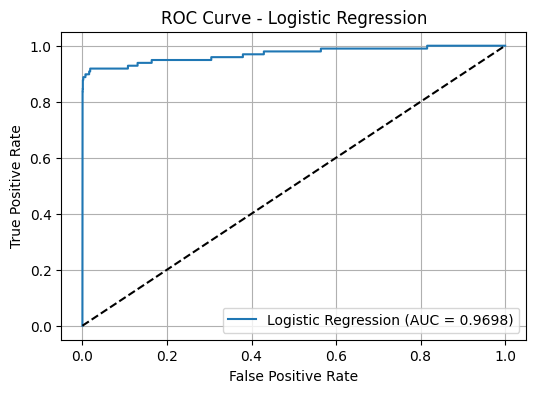

In [37]:
# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize and train model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred_lr = log_reg.predict(X_test)
y_proba_lr = log_reg.predict_proba(X_test)[:, 1]

# Evaluate performance
lr_precision = precision_score(y_test, y_pred_lr, zero_division=0)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)
lr_auc = roc_auc_score(y_test, y_proba_lr)

# Print metrics
print("Logistic Regression Performance")
print("--------------------------------")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall   : {lr_recall:.4f}")
print(f"F1-Score : {lr_f1:.4f}")
print(f"ROC-AUC  : {lr_auc:.4f}")
print("\n")

# Plot ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)

plt.figure(figsize=(6,4))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {lr_auc:.4f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid()
plt.show()



In [38]:
# Train Random Forest

import numpy as np
from sklearn.ensemble import RandomForestClassifier
import time

# Choose a subset of 50,000 rows from SMOTE data
subset_size = 50000
indices = np.random.choice(X_train_resampled.shape[0], subset_size, replace=False)

X_train_subset = X_train_resampled.iloc[indices]
y_train_subset = y_train_resampled.iloc[indices]

print("Subset selected:", X_train_subset.shape)

# Train Random Forest on this subset
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    random_state=42,
    n_jobs=-1
)

start = time.time()
rf.fit(X_train_subset, y_train_subset)
print(f"Random Forest  trained in {time.time() - start:.2f} seconds.")


Subset selected: (50000, 30)
Random Forest  trained in 18.70 seconds.


Random Forest Performance
-------------------------------------
Precision: 0.5541
Recall   : 0.8878
F1-score : 0.6824
ROC-AUC  : 0.9710




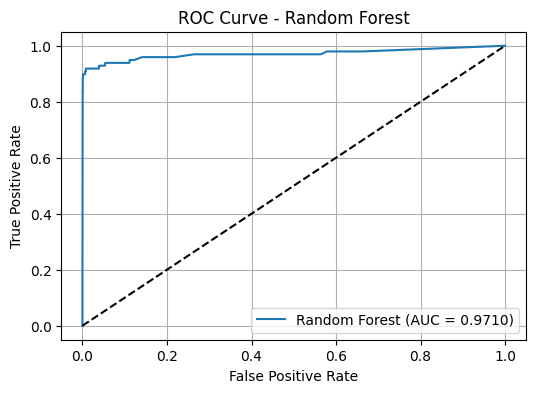

In [43]:
# Step 5.2.2 Evaluate Random Forest (Metrics)
from sklearn.metrics import (
    precision_score, recall_score,
    f1_score, roc_auc_score,roc_curve
)
import matplotlib.pyplot as plt

# Predictions & probabilities
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

#Print Metrics
rf_precision = precision_score(y_test, y_pred_rf, zero_division=0)
rf_recall    = recall_score(y_test, y_pred_rf)
rf_f1        = f1_score(y_test, y_pred_rf)
rf_auc       = roc_auc_score(y_test, y_proba_rf)

#Evaluate Metrics
print("Random Forest Performance")
print("-------------------------------------")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall   : {rf_recall:.4f}")
print(f"F1-score : {rf_f1:.4f}")
print(f"ROC-AUC  : {rf_auc:.4f}")
print("\n")

# Plot ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(6,4))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {rf_auc:.4f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.grid()
plt.show()

Random Forest Performance
-------------------------------------
Precision: 0.5541
Recall   : 0.8878
F1-score : 0.6824
ROC-AUC  : 0.9710




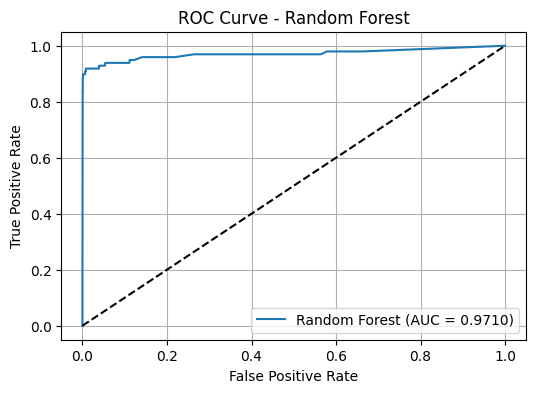

In [44]:
# Step 5.2.2 Evaluate Random Forest (Metrics)
from sklearn.metrics import (
    precision_score, recall_score,
    f1_score, roc_auc_score,roc_curve
)
import matplotlib.pyplot as plt

# Predictions & probabilities
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

#Print Metrics
rf_precision = precision_score(y_test, y_pred_rf, zero_division=0)
rf_recall    = recall_score(y_test, y_pred_rf)
rf_f1        = f1_score(y_test, y_pred_rf)
rf_auc       = roc_auc_score(y_test, y_proba_rf)

#Evaluate Metrics
print("Random Forest Performance")
print("-------------------------------------")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall   : {rf_recall:.4f}")
print(f"F1-score : {rf_f1:.4f}")
print(f"ROC-AUC  : {rf_auc:.4f}")
print("\n")

# Plot ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(6,4))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {rf_auc:.4f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.grid()
plt.show()

# Model Evaluation

In [41]:
# Calculate metrics: Precision, Recall, F1-score, ROC-AUC

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Logistic Regression metrics
lr_precision = precision_score(y_test, y_pred_lr, zero_division=0)
lr_recall    = recall_score(y_test, y_pred_lr)
lr_f1        = f1_score(y_test, y_pred_lr)
lr_auc       = roc_auc_score(y_test, y_proba_lr)

# Random Forest metrics
rf_precision = precision_score(y_test, y_pred_rf, zero_division=0)
rf_recall    = recall_score(y_test, y_pred_rf)
rf_f1        = f1_score(y_test, y_pred_rf)
rf_auc       = roc_auc_score(y_test, y_proba_rf)

print("Model Evaluation Metrics (Test Set)")
print("----------------------------------")
print("Logistic Regression:")
print(f"Precision : {lr_precision:.4f}")
print(f"Recall    : {lr_recall:.4f}")
print(f"F1-Score  : {lr_f1:.4f}")
print(f"ROC-AUC   : {lr_auc:.4f}\n")

print("Random Forest:")
print(f"Precision : {rf_precision:.4f}")
print(f"Recall    : {rf_recall:.4f}")
print(f"F1-Score  : {rf_f1:.4f}")
print(f"ROC-AUC   : {rf_auc:.4f}")


Model Evaluation Metrics (Test Set)
----------------------------------
Logistic Regression:
Precision : 0.0581
Recall    : 0.9184
F1-Score  : 0.1094
ROC-AUC   : 0.9698

Random Forest:
Precision : 0.5541
Recall    : 0.8878
F1-Score  : 0.6824
ROC-AUC   : 0.9710


In [45]:
comparison_df = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1-Score", "ROC-AUC"],
    "Logistic Regression": [
        lr_precision, lr_recall, lr_f1, lr_auc
    ],
    "Random Forest": [
        rf_precision, rf_recall, rf_f1, rf_auc
    ]
})

comparison_df



,Metric,Logistic Regression,Random Forest
0,Precision,0.058140,0.554140
1,Recall,0.918367,0.887755
2,F1-Score,0.109356,0.682353
3,ROC-AUC,0.969848,0.970971


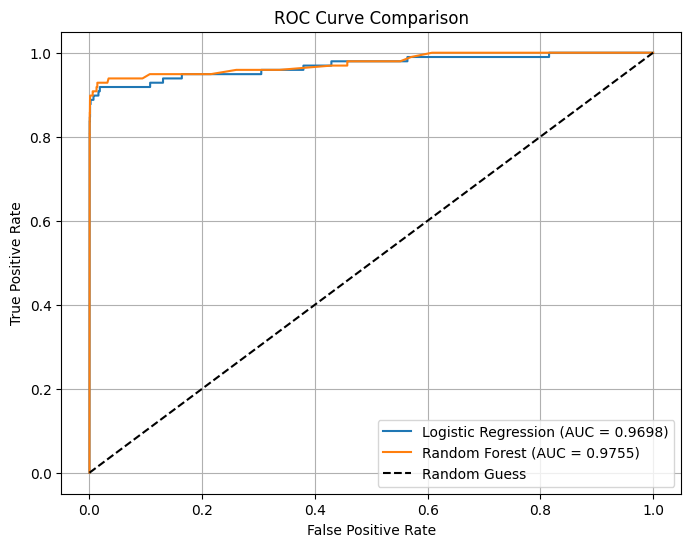

In [ ]:
# Plot ROC Curves for both models

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ROC curve for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
auc_lr = roc_auc_score(y_test, y_proba_lr)

# ROC curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)

plt.figure(figsize=(8,6))

# Logistic Regression
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.4f})")

# Random Forest
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.4f})")

# Random guess baseline
plt.plot([0,1], [0,1], 'k--', label="Random Guess")

plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()
